In [1]:
import pandas as pd

filename = 'gd1_candidates.hdf5'
candidate_df = pd.read_hdf(filename, 'candidate_df')

In [2]:
from astropy.table import Table

candidate_table = Table.from_pandas(candidate_df)
type(candidate_table)

astropy.table.table.Table

In [3]:
table = candidate_table[['source_id']]
table.write('candidate_df.xml', format='votable', overwrite=True)

In [4]:
query = """SELECT *
FROM gaiadr2.panstarrs1_best_neighbour as best
JOIN tap_upload.candidate_df as candidate_df
ON best.source_id = candidate_df.source_id
"""

In [5]:
from astroquery.gaia import Gaia

job = Gaia.launch_job_async(query=query, 
                            upload_resource='candidate_df.xml', 
                            upload_table_name='candidate_df')

Created TAP+ (v1.2.1) - Connection:
	Host: gea.esac.esa.int
	Use HTTPS: True
	Port: 443
	SSL Port: 443
Created TAP+ (v1.2.1) - Connection:
	Host: geadata.esac.esa.int
	Use HTTPS: True
	Port: 443
	SSL Port: 443
INFO: Query finished. [astroquery.utils.tap.core]


In [6]:
results = job.get_results()
results

<Table length=3724>
    source_id      original_ext_source_id ...    source_id_2    
                                          ...                   
      int64                int64          ...       int64       
------------------ ---------------------- ... ------------------
635860218726658176     130911385187671349 ... 635860218726658176
635674126383965568     130831388428488720 ... 635674126383965568
635535454774983040     130631378377657369 ... 635535454774983040
635497276810313600     130811380445631930 ... 635497276810313600
635614168640132864     130571395922140135 ... 635614168640132864
635598607974369792     130341392091279513 ... 635598607974369792
635737661835496576     131001399333502136 ... 635737661835496576
635850945892748672     132011398654934147 ... 635850945892748672
635600532119713664     130421392285893623 ... 635600532119713664
               ...                    ... ...                ...
612241781249124608     129751343755995561 ... 612241781249124608
612332147361443072     130141341458538777 ... 612332147361443072
612426744016802432     130521346852465656 ... 612426744016802432
612331739340341760     130111341217793839 ... 612331739340341760
612282738058264960     129741340445933519 ... 612282738058264960
612386332668697600     130351354570219774 ... 612386332668697600
612296172717818624     129691338006168780 ... 612296172717818624
612250375480101760     129741346475897464 ... 612250375480101760
612394926899159168     130581355199751795 ... 612394926899159168
612256418500423168     129931349075297310 ... 612256418500423168

In [7]:
table_ext = results[['source_id', 'original_ext_source_id']]
table_ext.write('external.xml', format='votable', overwrite=True)

In [8]:
query2 = """SELECT
external.source_id, ps.g_mean_psf_mag, ps.i_mean_psf_mag
FROM gaiadr2.panstarrs1_original_valid as ps
JOIN tap_upload.external as external
ON ps.obj_id = external.original_ext_source_id
"""

In [9]:
job2 = Gaia.launch_job_async(query=query2, 
                       upload_resource='external.xml', 
                       upload_table_name='external')

INFO: Query finished. [astroquery.utils.tap.core]


In [10]:
results2 = job2.get_results()
results2

<Table length=3724>
    source_id       g_mean_psf_mag   i_mean_psf_mag 
                                          mag       
      int64            float64          float64     
------------------ ---------------- ----------------
635860218726658176 17.8978004455566 17.5174007415771
635674126383965568 19.2873001098633 17.6781005859375
635535454774983040 16.9237995147705  16.478099822998
635497276810313600 19.9242000579834 18.3339996337891
635614168640132864 16.1515998840332 14.6662998199463
635598607974369792 16.5223999023438 16.1375007629395
635737661835496576 14.5032997131348 13.9849004745483
635850945892748672 16.5174999237061 16.0450000762939
635600532119713664 20.4505996704102 19.5177001953125
               ...              ...              ...
612241781249124608 20.2343997955322 18.6518001556396
612332147361443072 21.3848991394043 20.3076000213623
612426744016802432 17.8281002044678 17.4281005859375
612331739340341760 21.8656997680664 19.5223007202148
612282738058264960 22.5151996612549 19.9743995666504
612386332668697600 19.3792991638184 17.9923000335693
612296172717818624 17.4944000244141  16.926700592041
612250375480101760 15.3330001831055 14.6280002593994
612394926899159168 16.4414005279541 15.8212003707886
612256418500423168 20.8715991973877 19.9612007141113

In [11]:
filename = 'gd1_photo.fits'
results2.write(filename, overwrite=True)

In [12]:
from astropy.table import Table

photo_table = Table.read(filename)

In [13]:
len(photo_table)

3724

In [14]:
photo_table

<Table length=3724>
    source_id       g_mean_psf_mag   i_mean_psf_mag 
                                          mag       
      int64            float64          float64     
------------------ ---------------- ----------------
635860218726658176 17.8978004455566 17.5174007415771
635674126383965568 19.2873001098633 17.6781005859375
635535454774983040 16.9237995147705  16.478099822998
635497276810313600 19.9242000579834 18.3339996337891
635614168640132864 16.1515998840332 14.6662998199463
635598607974369792 16.5223999023438 16.1375007629395
635737661835496576 14.5032997131348 13.9849004745483
635850945892748672 16.5174999237061 16.0450000762939
635600532119713664 20.4505996704102 19.5177001953125
               ...              ...              ...
612241781249124608 20.2343997955322 18.6518001556396
612332147361443072 21.3848991394043 20.3076000213623
612426744016802432 17.8281002044678 17.4281005859375
612331739340341760 21.8656997680664 19.5223007202148
612282738058264960 22.5151996612549 19.9743995666504
612386332668697600 19.3792991638184 17.9923000335693
612296172717818624 17.4944000244141  16.926700592041
612250375480101760 15.3330001831055 14.6280002593994
612394926899159168 16.4414005279541 15.8212003707886
612256418500423168 20.8715991973877 19.9612007141113

In [16]:
import matplotlib.pyplot as plt

def plot_cmd(photo_table):
    y = photo_table['g_mean_psf_mag']
    x = photo_table['g_mean_psf_mag'] - photo_table['i_mean_psf_mag']

    plt.plot(x, y, 'ko', markersize=0.3, alpha=0.3)

    plt.xlim(0, 1.5)
    plt.ylim(14, 22)

    plt.gca().invert_yaxis()

    plt.ylabel(r'$g_0$')
    plt.xlabel(r'$(g-i)_0$');

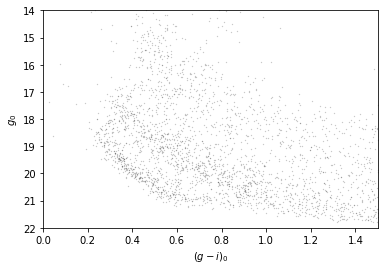

In [17]:
plot_cmd(photo_table)

In [18]:
import matplotlib as mpl

mpl.get_backend()

'module://ipykernel.pylab.backend_inline'

In [19]:
mpl.rcParams['backend']

'module://ipykernel.pylab.backend_inline'

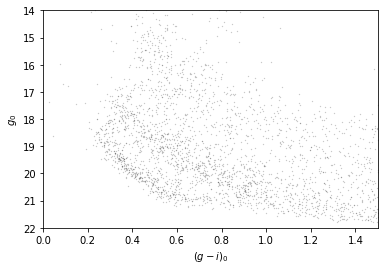

In [20]:
import matplotlib as mpl

# NOTE: Don't do this.  

mpl.use('TkAgg')
plot_cmd(photo_table)
coords = plt.ginput(10)

In [21]:
mpl.use('agg')

In [22]:
coords = [(0.2643369175627239, 17.84253127299485),
 (0.3539426523297491, 18.799116997792495),
 (0.47491039426523296, 19.682119205298015),
 (0.6317204301075269, 20.454746136865342),
 (0.7661290322580645, 20.785871964679913),
 (0.8064516129032258, 21.41133186166299),
 (0.5869175627240143, 21.300956585724798),
 (0.39426523297491034, 20.565121412803535),
 (0.22401433691756267, 19.240618101545255),
 (0.19713261648745517, 18.02649006622517)]

In [23]:
coords

[(0.2643369175627239, 17.84253127299485),
 (0.3539426523297491, 18.799116997792495),
 (0.47491039426523296, 19.682119205298015),
 (0.6317204301075269, 20.454746136865342),
 (0.7661290322580645, 20.785871964679913),
 (0.8064516129032258, 21.41133186166299),
 (0.5869175627240143, 21.300956585724798),
 (0.39426523297491034, 20.565121412803535),
 (0.22401433691756267, 19.240618101545255),
 (0.19713261648745517, 18.02649006622517)]

In [24]:
import numpy as np

xs, ys = np.transpose(coords)

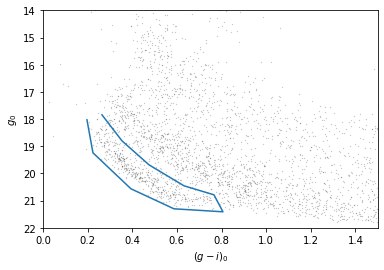

In [25]:
plot_cmd(photo_table)
plt.plot(xs, ys);

In [26]:
from matplotlib.path import Path

path = Path(coords)

In [27]:
points = [(0.4, 20), (0.4, 16)]

In [28]:
path.contains_points(points)

array([ True, False])

In [29]:
photo_table

<Table length=3724>
    source_id       g_mean_psf_mag   i_mean_psf_mag 
                                          mag       
      int64            float64          float64     
------------------ ---------------- ----------------
635860218726658176 17.8978004455566 17.5174007415771
635674126383965568 19.2873001098633 17.6781005859375
635535454774983040 16.9237995147705  16.478099822998
635497276810313600 19.9242000579834 18.3339996337891
635614168640132864 16.1515998840332 14.6662998199463
635598607974369792 16.5223999023438 16.1375007629395
635737661835496576 14.5032997131348 13.9849004745483
635850945892748672 16.5174999237061 16.0450000762939
635600532119713664 20.4505996704102 19.5177001953125
               ...              ...              ...
612241781249124608 20.2343997955322 18.6518001556396
612332147361443072 21.3848991394043 20.3076000213623
612426744016802432 17.8281002044678 17.4281005859375
612331739340341760 21.8656997680664 19.5223007202148
612282738058264960 22.5151996612549 19.9743995666504
612386332668697600 19.3792991638184 17.9923000335693
612296172717818624 17.4944000244141  16.926700592041
612250375480101760 15.3330001831055 14.6280002593994
612394926899159168 16.4414005279541 15.8212003707886
612256418500423168 20.8715991973877 19.9612007141113

In [30]:
import pandas as pd

candidate_df = pd.read_hdf('gd1_candidates.hdf5', 'candidate_df')

In [31]:
candidate_df.head()

source_id          ra        dec      pmra      pmdec  parallax  \
0  635559124339440000  137.586717  19.196544 -3.770522 -12.490482  0.791393   
1  635860218726658176  138.518707  19.092339 -5.941679 -11.346409  0.307456   
2  635674126383965568  138.842874  19.031798 -3.897001 -12.702780  0.779463   
3  635535454774983040  137.837752  18.864007 -4.335041 -14.492309  0.314514   
4  635497276810313600  138.044516  19.009471 -7.172931 -12.291499  0.425404   

   parallax_error  radial_velocity       phi1      phi2   pm_phi1   pm_phi2  
0        0.271754              NaN -59.630489 -1.216485 -7.361363 -0.592633  
1        0.199466              NaN -59.247330 -2.016078 -7.527126  1.748779  
2        0.223692              NaN -59.133391 -2.306901 -7.560608 -0.741800  
3        0.102775              NaN -59.785300 -1.594569 -9.357536 -1.218492  
4        0.337689              NaN -59.557744 -1.682147 -9.000831  2.334407

In [33]:
len(candidate_df), len(photo_table)

(7346, 3724)

Hint: that's a join

In [34]:
type(candidate_df)

pandas.core.frame.DataFrame

In [35]:
type(photo_table)

astropy.table.table.Table

In [36]:
photo_df = photo_table.to_pandas()
type(photo_df)

pandas.core.frame.DataFrame

left: all the rows from the left table

right: all the rows from the right table

inner: intersection
 
outer: union

In [56]:
merged = pd.merge(candidate_df, photo_df,
                  on='source_id',
                  how='left')

In [57]:
len(merged)

7346

In [58]:
len(candidate_df)

7346

In [59]:
merged.head()

source_id          ra        dec      pmra      pmdec  parallax  \
0  635559124339440000  137.586717  19.196544 -3.770522 -12.490482  0.791393   
1  635860218726658176  138.518707  19.092339 -5.941679 -11.346409  0.307456   
2  635674126383965568  138.842874  19.031798 -3.897001 -12.702780  0.779463   
3  635535454774983040  137.837752  18.864007 -4.335041 -14.492309  0.314514   
4  635497276810313600  138.044516  19.009471 -7.172931 -12.291499  0.425404   

   parallax_error  radial_velocity       phi1      phi2   pm_phi1   pm_phi2  \
0        0.271754              NaN -59.630489 -1.216485 -7.361363 -0.592633   
1        0.199466              NaN -59.247330 -2.016078 -7.527126  1.748779   
2        0.223692              NaN -59.133391 -2.306901 -7.560608 -0.741800   
3        0.102775              NaN -59.785300 -1.594569 -9.357536 -1.218492   
4        0.337689              NaN -59.557744 -1.682147 -9.000831  2.334407   

   g_mean_psf_mag  i_mean_psf_mag  
0             NaN             NaN  
1         17.8978       17.517401  
2         19.2873       17.678101  
3         16.9238       16.478100  
4         19.9242       18.334000

In [60]:
merged['mag'] = merged['g_mean_psf_mag']

In [61]:
merged['color'] = merged['g_mean_psf_mag'] - merged['i_mean_psf_mag']

In [62]:
merged.columns

Index(['source_id', 'ra', 'dec', 'pmra', 'pmdec', 'parallax', 'parallax_error',
       'radial_velocity', 'phi1', 'phi2', 'pm_phi1', 'pm_phi2',
       'g_mean_psf_mag', 'i_mean_psf_mag', 'mag', 'color'],
      dtype='object')

In [63]:
merged['color'].notnull().sum()

3724

In [64]:
merged['color'].isnull().sum()

3622

**Next step: select the rows where the photometry data falls in the polygon we identified**

In [65]:
from matplotlib.path import Path

path = Path(coords)
path

Path(array([[ 0.26433692, 17.84253127],
       [ 0.35394265, 18.799117  ],
       [ 0.47491039, 19.68211921],
       [ 0.63172043, 20.45474614],
       [ 0.76612903, 20.78587196],
       [ 0.80645161, 21.41133186],
       [ 0.58691756, 21.30095659],
       [ 0.39426523, 20.56512141],
       [ 0.22401434, 19.2406181 ],
       [ 0.19713262, 18.02649007]]), None)

In [66]:
points = [(0.4, 20), (0.4, 16)]

In [67]:
path.contains_points(points)

array([ True, False])

In [74]:
points = merged[['color', 'mag']]    # select `color` and `mag`
points.head()

color      mag
0     NaN      NaN
1  0.3804  17.8978
2  1.6092  19.2873
3  0.4457  16.9238
4  1.5902  19.9242

In [73]:
is_inside = path.contains_points(points)
is_inside.sum()

481

In [76]:
selected2 = merged[is_inside]
selected2.head()

source_id          ra        dec      pmra      pmdec  parallax  \
52  636170384085347968  136.762984  18.627660 -4.929947 -12.324957  0.080572   
58  636199658582021632  136.690129  18.973757 -3.199581 -13.434429  0.062917   
78  636363795052181888  136.586430  19.402934 -3.360965 -13.160503  0.156392   
84  636456703784789248  136.061195  19.322230 -5.691713 -11.289811 -0.026094   
88  636563700010029312  136.320112  19.709247 -5.901632 -12.474899 -0.654865   

    parallax_error  radial_velocity       phi1      phi2   pm_phi1   pm_phi2  \
52        0.774262              NaN -60.526296 -0.857776 -7.890487  0.556206   
58        0.320584              NaN -60.268864 -0.616365 -7.907829 -1.483160   
78        0.436150              NaN -59.956071 -0.306603 -7.748759 -1.180119   
84        0.377111              NaN -60.285543  0.072223 -7.407813  1.842187   
88        0.766358              NaN -59.828026  0.068110 -8.503892  1.377714   

    g_mean_psf_mag  i_mean_psf_mag        mag     color  
52       20.595800         20.0585  20.595800  0.537300  
58       19.345800         19.0042  19.345800  0.341600  
78       19.855801         19.3862  19.855801  0.469601  
84       19.303400         18.8925  19.303400  0.410900  
88       20.515301         20.0103  20.515301  0.505001

In [82]:
mpl.use('agg')

In [83]:
%matplotlib inline

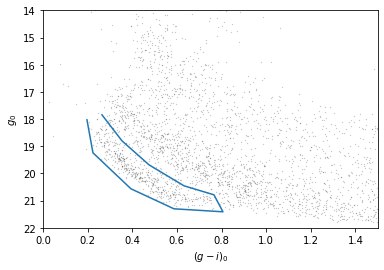

In [85]:
plot_cmd(photo_table)
plt.plot(xs, ys)

#plt.plot(selected2['color'], selected2['mag'], 'gx');

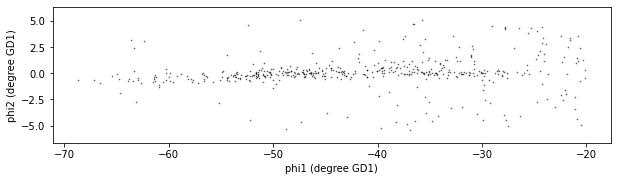

In [90]:
plt.figure(figsize=(10, 2.5))

x = selected2['phi1']
y = selected2['phi2']

plt.plot(x, y, 'ko', markersize=0.6, alpha=0.6)

plt.xlabel('phi1 (degree GD1)')
plt.ylabel('phi2 (degree GD1)')

plt.axis('equal');

In [102]:
!rm gd1_merged.hdf5

In [105]:
filename = 'gd1_merged.hdf5'

merged.to_hdf(filename, 'merged')
selected2.to_hdf(filename, 'selected', mode='a')

In [106]:
!ls -lh gd1_merged.hdf5

-rw-rw-r-- 1 downey downey 1.1M Nov 20 14:09 gd1_merged.hdf5


In [107]:
len(merged)

7346

In [94]:
len(selected2)

481

In [110]:
coords_df = pd.DataFrame(coords)

In [111]:
filename = 'gd1_polygon.hdf5'

coords_df.to_hdf(filename, 'coords_df')

In [113]:
import os
from wget import download
url = 'https://raw.githubusercontent.com/AllenDowney/AstronomicalData/main/class_notebooks/lesson_7.ipynb'
print(download(url))

lesson_7 (1).ipynb
